# Plotting the data

In this notebook we'll just plot the data without any analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Figure formatting
plt.rc("text", usetex = True)
plt.rc("font", size = 24, family = "serif")
plt.rc("errorbar", capsize = 3)

In [3]:
#Load the data
data_object = np.load("../data/dsigma_advact_SNRgt5_z0.1-0.9.npz")
cov = data_object["cov"]
DeltaSigma = data_object["dsigma"]

In [4]:
#Bin edges of our analysis
d_lnR = 0.48755 #bin width in ln(R)
Redges = np.exp(np.arange(19)*d_lnR + np.log(0.02)) #in Mpc physical

In [5]:
#Midpoints of the radial bins, for plotting
R = (Redges[:-1] + Redges[1:])/2

In [6]:
#Convert R to Mpc/h comoving
h = 0.7
z = 0.4925 #Median redshift
R = R * (1 + z) * h

In [7]:
#Compute the SNR of the profile
print(DeltaSigma.shape)
print("SNR = ", np.dot(DeltaSigma, np.linalg.solve(cov, DeltaSigma)))

(18,)
SNR =  1686.3092180447643


Text(0, 0.5, '$\\Delta\\Sigma\\ [h{\\rm M_\\odot/pc}^2]$')

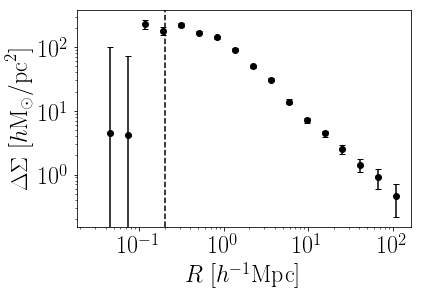

In [8]:
#Plot the lensing profile
plt.errorbar(R, DeltaSigma, np.sqrt(cov.diagonal()), ls='', c='k', marker='o')
plt.axvline(0.2, c='k', ls='--') #Below 200 kpc/h we don't trust the profile
plt.loglog()
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\Delta\Sigma\ [h{\rm M_\odot/pc}^2]$")

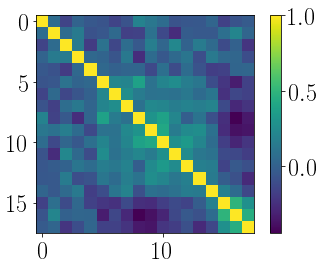

In [10]:
#Plot the correlation matrix
D = np.sqrt(np.diag(cov.diagonal()))
Dinv = np.linalg.inv(D)
corr = np.dot(Dinv, np.dot(cov, Dinv))
plt.imshow(corr)
plt.colorbar()